# Author:-Harshal Kakade

## Task-6:-Prediction using Decision Tree Algorithm

## Problem Statement:-Create the Decision Tree classifier and visualize it graphically.The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.


# The Spark Foundation
## Graduate Rotational Internship Program(GRIP) July-2021 Batch
### Data Science and Business Analytics 

In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# reading the dataset
df=pd.read_csv('Iris.csv')

In [3]:
# head():-displays top five rows
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# checking shape of dataset
df.shape

(150, 6)

In [5]:
# checking data types of features
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [6]:
# checking some information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
# checking for missing/null values
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

There is no missing/null values in dataset

In [8]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [9]:
# dropping id column
df.drop('Id',axis=1,inplace=True)

In [10]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
# checking basic statistics
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
# checking features correlation
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


In [13]:
# dividing data into dependent and independent features
x=df.iloc[:,0:4]
y=df.iloc[:,-1]

In [14]:
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [15]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [16]:
# importing labelencoder to encode the labels
from sklearn.preprocessing import LabelEncoder

# creating object of labelencoder
le=LabelEncoder()

# fitting labels to encode
le.fit(y)

LabelEncoder()

In [17]:
le.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [18]:
# tronsforming the labels
y=le.transform(y)

In [19]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [73]:
# splitting data into train and test
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.2,random_state=1)

In [74]:
xtrain.shape

(120, 4)

In [75]:
xtest.shape

(30, 4)

In [76]:
ytrain.shape

(120,)

In [77]:
ytest.shape

(30,)

In [78]:
# model building
# importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# creating object for decisiontreeclassifier
dtc=DecisionTreeClassifier()

# train the model
dtc.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [79]:
# prediction on xtest data
ypred=dtc.predict(xtest)
ypred

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2])

In [80]:
# comapring actual and predicted values
df1=pd.DataFrame({'Actual':ytest,'Predicted':ypred})
df1

,Actual,Predicted
0,0,0
1,1,1
2,1,1
3,0,0
4,2,2
5,1,1
6,2,2
7,0,0
8,0,0
9,2,2


In [81]:
# evaluating the performance of model
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print('Accuracy:',accuracy_score(ytest,ypred))
print('\nConfusion Matrix:\n',(confusion_matrix(ytest,ypred)))
print('\nClassification Report:\n\n',classification_report(ytest,ypred))

Accuracy: 0.9666666666666667

Confusion Matrix:
 [[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]

Classification Report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [90]:
# our own data predictions
dtc.predict([[5.0,3.4,1.5,0.3,]])

array([0])

[Text(334.8, 498.3, 'X[3] <= 0.8\ngini = 0.665\nsamples = 120\nvalue = [39, 37, 44]'),
 Text(251.10000000000002, 407.70000000000005, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(418.5, 407.70000000000005, 'X[3] <= 1.65\ngini = 0.496\nsamples = 81\nvalue = [0, 37, 44]'),
 Text(167.4, 317.1, 'X[2] <= 4.95\ngini = 0.18\nsamples = 40\nvalue = [0, 36, 4]'),
 Text(83.7, 226.5, 'gini = 0.0\nsamples = 35\nvalue = [0, 35, 0]'),
 Text(251.10000000000002, 226.5, 'X[3] <= 1.55\ngini = 0.32\nsamples = 5\nvalue = [0, 1, 4]'),
 Text(167.4, 135.89999999999998, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(334.8, 135.89999999999998, 'X[0] <= 6.6\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(251.10000000000002, 45.299999999999955, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(418.5, 45.299999999999955, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(669.6, 317.1, 'X[2] <= 4.85\ngini = 0.048\nsamples = 41\nvalue = [0, 1, 40]'),
 Text(585.9, 226.5, 'X[1] <= 3.1\ngini = 

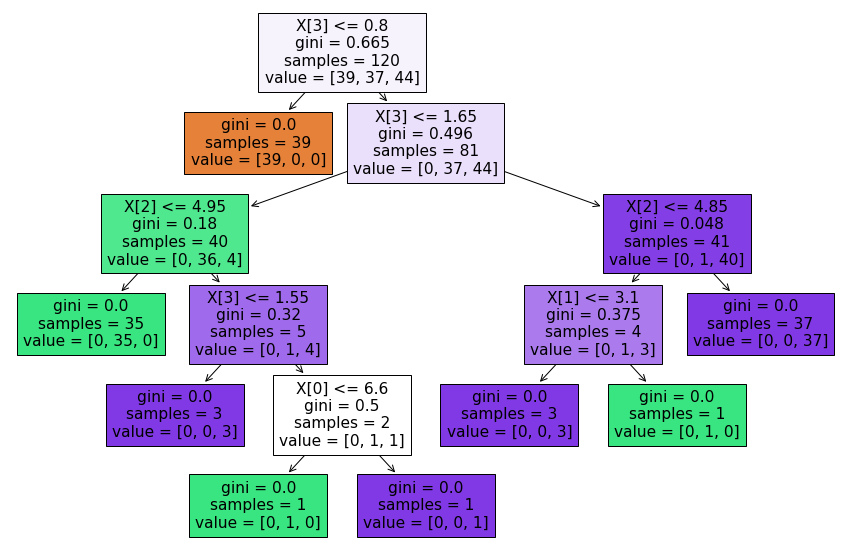

In [83]:
# visualization of decision tree
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(dtc,filled=True,)

Now we can feed any new/test data to this classifier and it would be able to predict the right class accordingly.